In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [24]:
def round_list(list, decimal):
    new_list = []
    for number in list:
        new_list.append(round(number, decimal))
    return new_list

In [25]:
#Choose which sessions and values to analyse

session = 'pre_drink' # Compare the sessions before drinks
#session = 'alcohol' # Compare before and after alcohol
#session = 'placebo' # Compare before and after non-alcohol
#session = 'normal' # Compare non-alcohol vs alcohol

value = 'accuracy'
#value = 'RT'

rounding_var = 0
if value == 'accuracy':
    rounding_var = 3

In [26]:
if session == 'pre_drink':
    labels = ['Pre-non-alcohol', 'Pre-alcohol']
    color = ['palevioletred', 'lightskyblue']
    placebo = pd.read_csv('Group level/Baseline-placebo.csv')
    alcohol = pd.read_csv('Group level/Baseline-alcohol.csv')   
elif session == 'alcohol':
    labels = ['Pre-alcohol', 'Alcohol']
    color = ['lightskyblue', 'cornflowerblue']
    placebo = pd.read_csv('Group level/Baseline-alcohol.csv')
    alcohol = pd.read_csv('Group level/Alcohol.csv')
elif session == 'placebo':
    labels = ['Pre-non-alcohol', 'Non-alcohol']
    color = ['palevioletred', 'plum']
    placebo = pd.read_csv('Group level/Baseline-placebo.csv')
    alcohol = pd.read_csv('Group level/Placebo.csv')
elif session == 'normal':
    labels = ['Non-alcohol', 'Alcohol']
    color = ['plum', 'cornflowerblue']
    placebo = pd.read_csv('Group level/Placebo.csv')
    alcohol = pd.read_csv('Group level/Alcohol.csv')   

In [27]:
# Fix types and change None to max RT [ms]
alcohol['RT'] = alcohol['RT'].replace('None',2000).astype(int)
placebo['RT'] = placebo['RT'].replace('None',2000).astype(int)

alcohol = alcohol.astype({'trialtype':'string'})
placebo = placebo.astype({'trialtype':'string'})

In [28]:
# Finding standard deviations
p_std = np.std(placebo[value])
a_std = np.std(alcohol[value])

#Finding means
p_mean = placebo[value].mean()
a_mean = alcohol[value].mean()

In [29]:
#Finding t-statistics
statistic, pvalue = ttest_ind(placebo[value], alcohol[value])
print('T-statistic value for ' + value + ': ', statistic)
print('P-value for ' + value + ': ', format(pvalue, 'f'))
print('P-value scientific notation: ', pvalue)

T-statistic value for accuracy:  -2.7170353889438763
P-value for accuracy:  0.006617
P-value scientific notation:  0.006616511498134695


In [30]:
# Adapted from https://stackoverflow.com/questions/11517986/indicating-the-statistically-significant-difference-in-bar-graph

def annotate_p_values(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if p < 0.00005:
                text = '****'
                break
            
            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

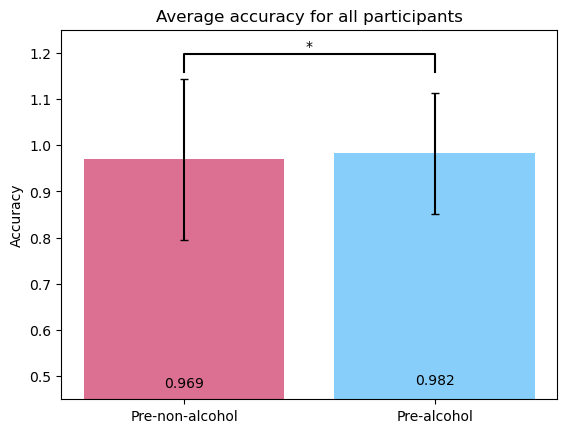

In [31]:
# Variables for plotting
means = round_list([p_mean, a_mean],rounding_var) # Rounding the values for visualisation
errors = [p_std, a_std]
bars = np.arange(len(means))

plot = plt.bar(labels, means, color=color)
plt.title('Average ' + value + ' for all participants')
plt.bar_label(plot, label_type='center')
plt.errorbar(labels, means, yerr=errors,fmt='none', capsize=3, ecolor='k') # Adds SD error bars
if value == 'RT':
    plt.ylabel('Response time [ms]')
    plt.ylim(300,1100)
    annotate_p_values(0,1,pvalue,center=bars,height=means,dh=.35)
elif value == 'accuracy':
    plt.ylabel('Accuracy')
    plt.ylim(0.45,1.25)
    annotate_p_values(0,1,pvalue,center=bars,height=means,dh=.22)
plt.savefig(session + '_' + value + '.png')

In [32]:
# Adding pre-experiment variables for plots to add inn appendix
#baseline = pd.read_csv('Group level/Baseline-All.csv')
#baseline['RT'] = baseline['RT'].replace('None',2000).astype(int)
#baseline = baseline.astype({'trialtype':'string'})
#baseline.dtypes

#b_mean = baseline[value].mean()
#b_std = np.std(baseline[value])

In [33]:
#labels = ['Pre-Experiment','Non-Alcohol', 'Alcohol']
#means = round_list([b_mean, p_mean, a_mean],rounding_var) # Rounding the values for visualisation
#color = ['lightgreen','plum', 'cornflowerblue']
#errors = [b_std,p_std, a_std]
#bars = np.arange(len(means))

#plot = plt.bar(labels, means, color=color)
#plt.title('Average ' + value + ' for all participants')
#plt.errorbar(labels, means, yerr=errors,fmt='none', capsize=3, ecolor='k') # Adds SD error bars
#if value == 'RT':
 #   plt.ylabel('Response time [ms]')
  #  plt.ylim(300,1000)
#elif value == 'accuracy':
#    plt.ylabel('Accuracy')
#    plt.ylim(0.45,1.2)
#plt.bar_label(plot, label_type='center')
#plt.savefig('pre_experiment' + session + value + '.png')